In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load cleaned data
print("Loading cleaned dataset...")
df = pd.read_csv('cleaned_infectious_disease.csv')
print(f"Dataset shape: {df.shape}")
print("\n" + "="*50 + "\n")

# 1. DESCRIPTIVE STATISTICS
print("1. DESCRIPTIVE STATISTICS")
print("="*30)

# Overall statistics
print("Overall Statistics:")
print(df.describe())

# Disease-specific statistics
print("\nDisease Statistics:")
disease_stats = df.groupby('Disease').agg({
    'Count': ['sum', 'mean', 'std', 'min', 'max'],
    'Rate': ['mean', 'std', 'min', 'max'],
    'Population': 'sum'
}).round(2)
print(disease_stats)



Loading cleaned dataset...
Dataset shape: (141777, 14)


1. DESCRIPTIVE STATISTICS
Overall Statistics:
                Year          Count    Population           Rate  \
count  141777.000000  141777.000000  1.417770e+05  141777.000000   
mean     2007.857678      81.368438  8.299702e+05       6.984715   
std         4.052999    1954.637660  3.452198e+06      44.861027   
min      2001.000000       0.000000  5.330000e+02       0.000000   
25%      2004.000000       0.000000  2.871500e+04       0.000000   
50%      2008.000000       0.000000  1.239460e+05       0.000000   
75%      2011.000000       1.000000  4.119620e+05       0.203000   
max      2014.000000  174557.000000  3.850149e+07    1020.550000   

            CI.lower       CI.upper  Calculated_Rate      Rate_Diff  \
count  141777.000000  141777.000000    141777.000000  141777.000000   
mean        5.726249      28.912777         6.984713       0.000098   
std        41.479404      87.209601        44.861024       0.001116   



2. TEMPORAL TREND ANALYSIS


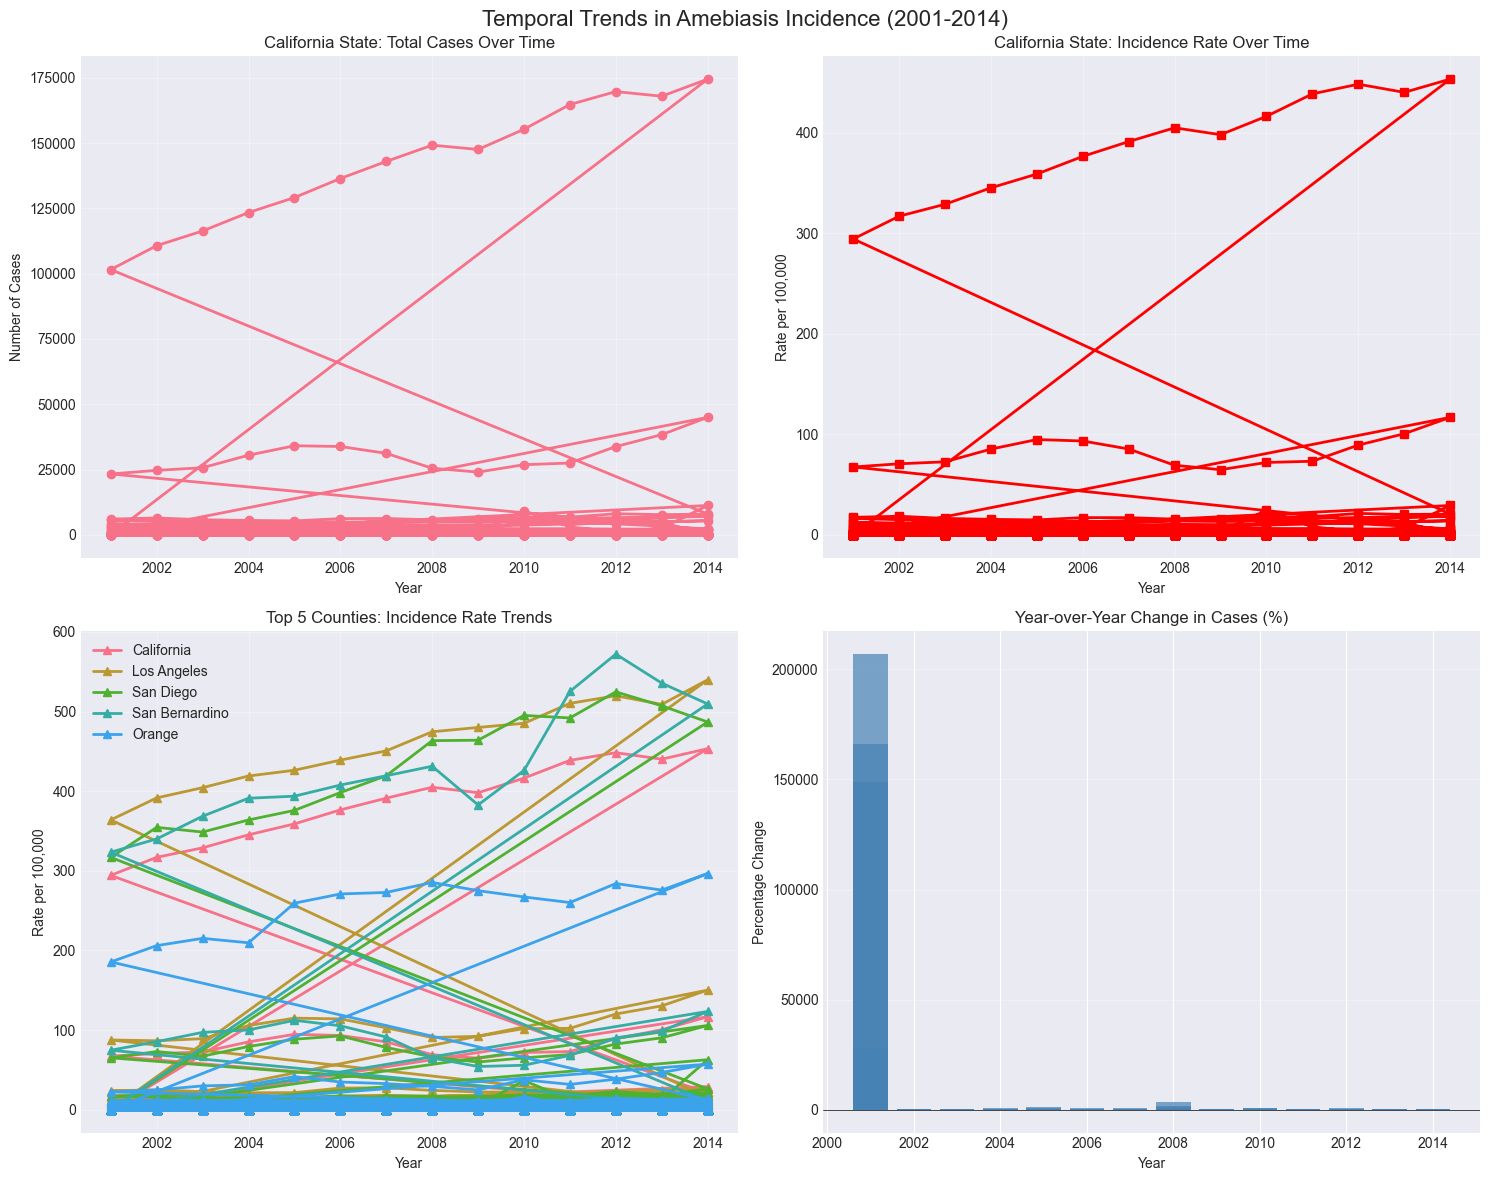

In [4]:
# 2. TEMPORAL TREND ANALYSIS
print("\n2. TEMPORAL TREND ANALYSIS")
print("="*30)

# Prepare data for temporal analysis
temporal_data = df[df['Sex'] == 'Total'].copy()

# Plot 1: State-level trends over time
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Temporal Trends in Amebiasis Incidence (2001-2014)', fontsize=16)

# State total cases over time
state_data = temporal_data[temporal_data['County'] == 'California']
ax1 = axes[0, 0]
ax1.plot(state_data['Year'], state_data['Count'], marker='o', linewidth=2)
ax1.set_title('California State: Total Cases Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Cases')
ax1.grid(True, alpha=0.3)

# State incidence rate over time
ax2 = axes[0, 1]
ax2.plot(state_data['Year'], state_data['Rate'], marker='s', color='red', linewidth=2)
ax2.set_title('California State: Incidence Rate Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Rate per 100,000')
ax2.grid(True, alpha=0.3)

# Top counties trend
top_counties = temporal_data.groupby('County')['Count'].sum().nlargest(5).index.tolist()
top_counties_data = temporal_data[temporal_data['County'].isin(top_counties)]

ax3 = axes[1, 0]
for county in top_counties:
    county_data = top_counties_data[top_counties_data['County'] == county]
    ax3.plot(county_data['Year'], county_data['Rate'], marker='^', label=county, linewidth=2)
ax3.set_title('Top 5 Counties: Incidence Rate Trends')
ax3.set_xlabel('Year')
ax3.set_ylabel('Rate per 100,000')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Year-over-year change
ax4 = axes[1, 1]
state_data['YoY_Change'] = state_data['Count'].pct_change() * 100
ax4.bar(state_data['Year'][1:], state_data['YoY_Change'][1:], color='steelblue', alpha=0.7)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax4.set_title('Year-over-Year Change in Cases (%)')
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage Change')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()




3. SPATIAL AND REGIONAL ANALYSIS
Top 10 Counties by Average Incidence Rate:
               Total_Cases  Avg_Population  Avg_Rate  Rate_Std  Cases_per_100K
County                                                                        
San Francisco       123144       801294.82     19.19     78.84    15368.126303
Kern                108281       799639.96     16.83     82.56    13541.219226
Fresno              108248       903290.85     14.98     79.71    11983.737021
Sacramento          140208      1386469.03     12.61     69.69    10112.595158
San Joaquin          63384       665857.12     11.87     63.65     9519.159306
Los Angeles         906252      9842911.05     11.49     61.74     9207.154219
Alameda             134754      1503255.94     11.21     56.11     8964.142194
Madera               12582       144667.72     10.85     59.21     8697.171698
Tulare               35983       425264.21     10.60     56.92     8461.328076
San Diego           255920      3048673.27     10.46  

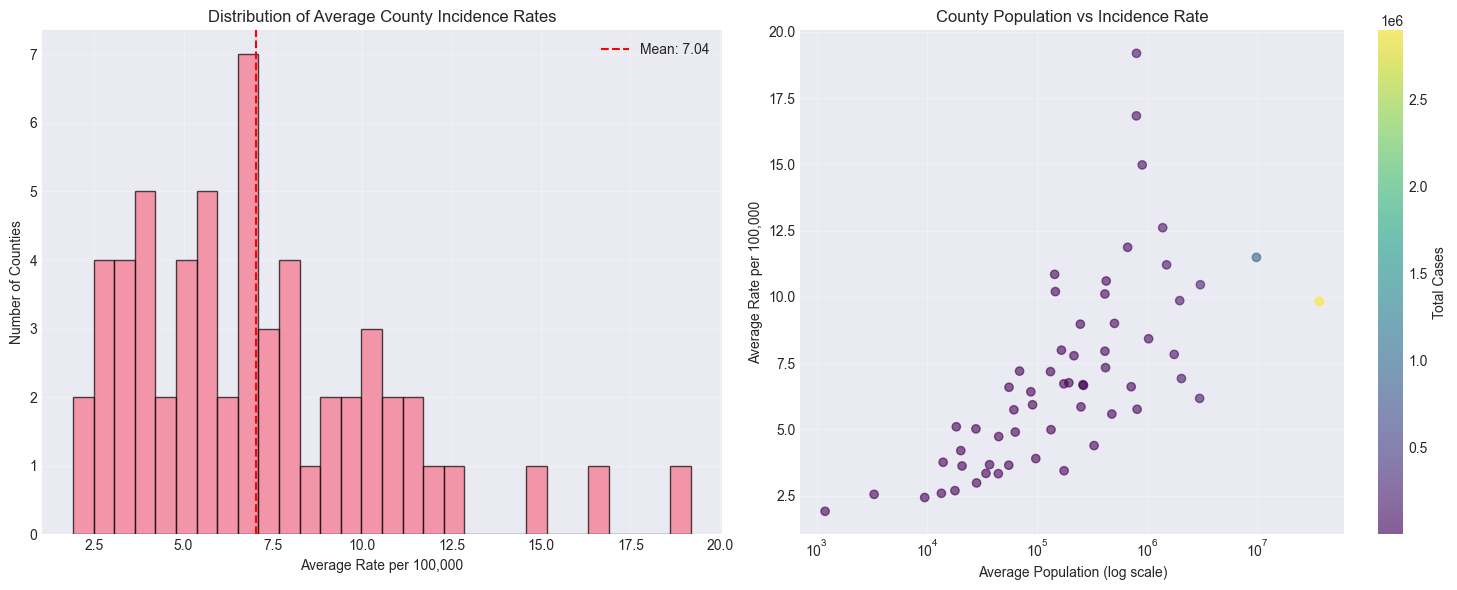

In [5]:
# 3. SPATIAL AND REGIONAL ANALYSIS
print("\n3. SPATIAL AND REGIONAL ANALYSIS")
print("="*30)

# Create county-level summary
county_summary = temporal_data.groupby('County').agg({
    'Count': 'sum',
    'Population': 'mean',  # Average population over years
    'Rate': ['mean', 'std']
}).round(2)

county_summary.columns = ['Total_Cases', 'Avg_Population', 'Avg_Rate', 'Rate_Std']
county_summary['Cases_per_100K'] = (county_summary['Total_Cases'] / county_summary['Avg_Population']) * 100000

# Sort by average rate
county_summary_sorted = county_summary.sort_values('Avg_Rate', ascending=False)

print("Top 10 Counties by Average Incidence Rate:")
print(county_summary_sorted.head(10))

print("\nBottom 10 Counties by Average Incidence Rate:")
print(county_summary_sorted.tail(10))

# Plot county distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of county rates
ax1 = axes[0]
ax1.hist(county_summary['Avg_Rate'], bins=30, edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Average County Incidence Rates')
ax1.set_xlabel('Average Rate per 100,000')
ax1.set_ylabel('Number of Counties')
ax1.axvline(x=county_summary['Avg_Rate'].mean(), color='red', linestyle='--', 
            label=f'Mean: {county_summary["Avg_Rate"].mean():.2f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Scatter plot: Population vs Rate
ax2 = axes[1]
scatter = ax2.scatter(county_summary['Avg_Population'], county_summary['Avg_Rate'], 
                      alpha=0.6, c=county_summary['Total_Cases'], cmap='viridis')
ax2.set_xscale('log')  # Log scale for better visualization
ax2.set_title('County Population vs Incidence Rate')
ax2.set_xlabel('Average Population (log scale)')
ax2.set_ylabel('Average Rate per 100,000')
plt.colorbar(scatter, ax=ax2, label='Total Cases')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('spatial_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



4. GENDER-BASED ANALYSIS


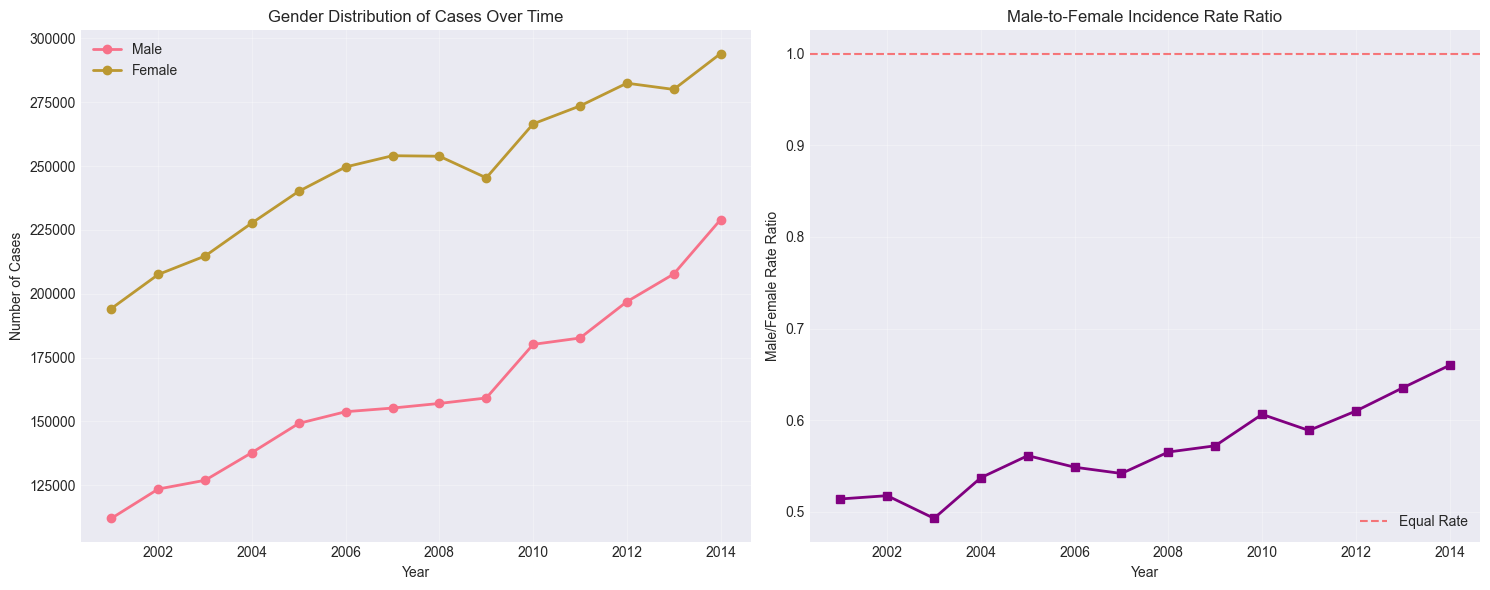

In [6]:
# 4. GENDER-BASED ANALYSIS
print("\n4. GENDER-BASED ANALYSIS")
print("="*30)

gender_data = df[df['Sex'].isin(['Male', 'Female'])].copy()

# Gender comparison
gender_summary = gender_data.groupby(['Year', 'Sex']).agg({
    'Count': 'sum',
    'Rate': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gender cases over time
ax1 = axes[0]
for sex in ['Male', 'Female']:
    sex_data = gender_summary[gender_summary['Sex'] == sex]
    ax1.plot(sex_data['Year'], sex_data['Count'], marker='o', label=sex, linewidth=2)
ax1.set_title('Gender Distribution of Cases Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Cases')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gender rate ratio
gender_pivot = gender_summary.pivot(index='Year', columns='Sex', values='Rate')
gender_pivot['Ratio'] = gender_pivot['Male'] / gender_pivot['Female']

ax2 = axes[1]
ax2.plot(gender_pivot.index, gender_pivot['Ratio'], marker='s', color='purple', linewidth=2)
ax2.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Equal Rate')
ax2.set_title('Male-to-Female Incidence Rate Ratio')
ax2.set_xlabel('Year')
ax2.set_ylabel('Male/Female Rate Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



5. CORRELATION ANALYSIS


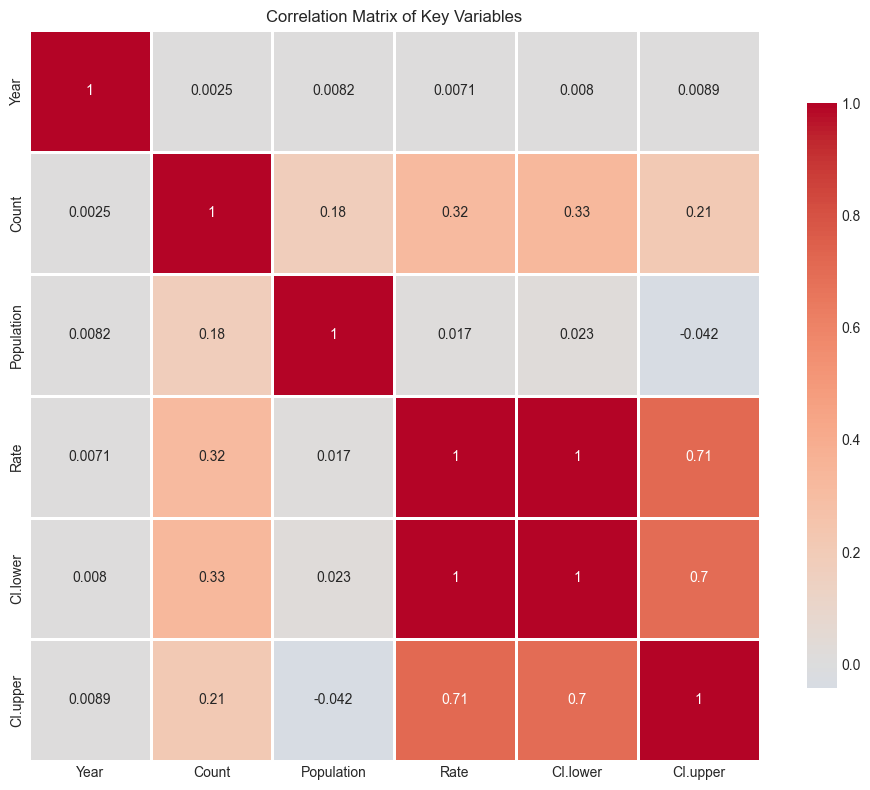

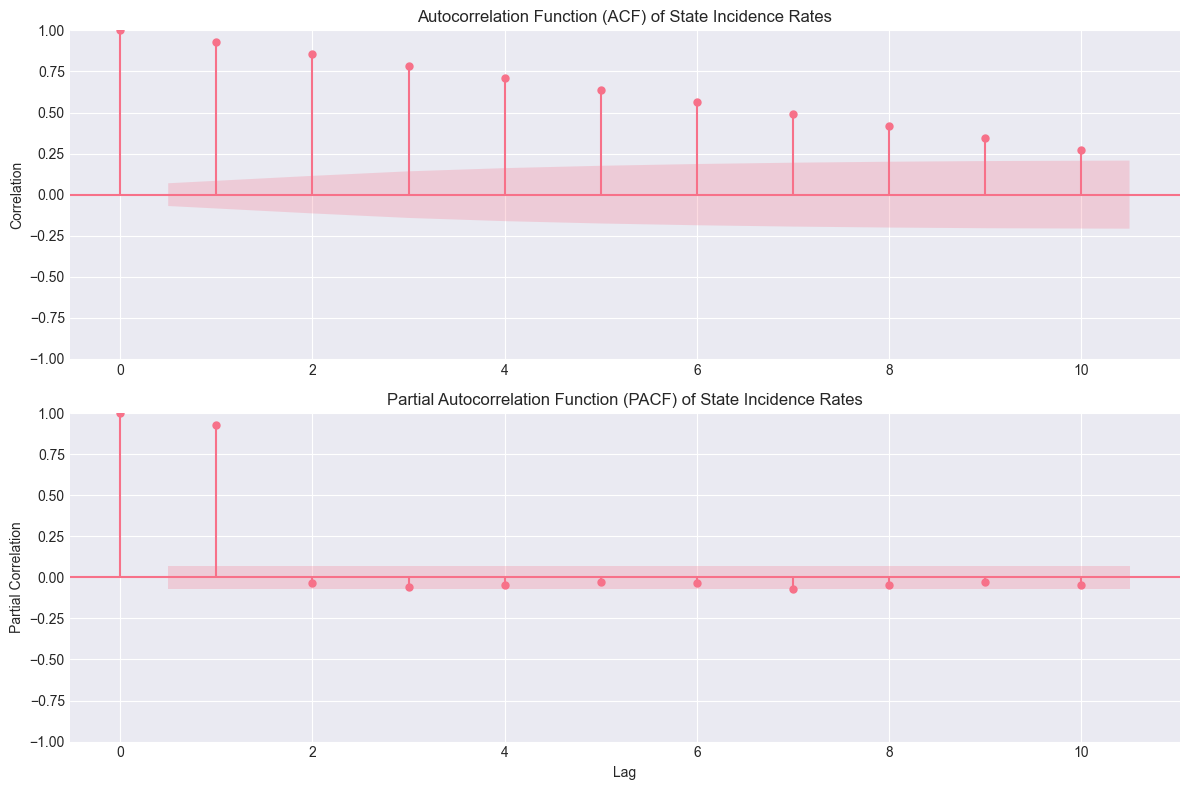

In [7]:
# 5. CORRELATION ANALYSIS
print("\n5. CORRELATION ANALYSIS")
print("="*30)

# Prepare correlation data
corr_data = temporal_data[['Year', 'Count', 'Population', 'Rate', 'CI.lower', 'CI.upper']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Time series correlation (autocorrelation)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
state_rates = state_data.set_index('Year')['Rate']

# ACF plot
plot_acf(state_rates, lags=10, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) of State Incidence Rates')
axes[0].set_ylabel('Correlation')

# PACF plot
plot_pacf(state_rates, lags=10, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) of State Incidence Rates')
axes[1].set_ylabel('Partial Correlation')
axes[1].set_xlabel('Lag')

plt.tight_layout()
plt.savefig('time_series_correlation.png', dpi=300, bbox_inches='tight')
plt.show()



6. DIMENSIONALITY REDUCTION ANALYSIS


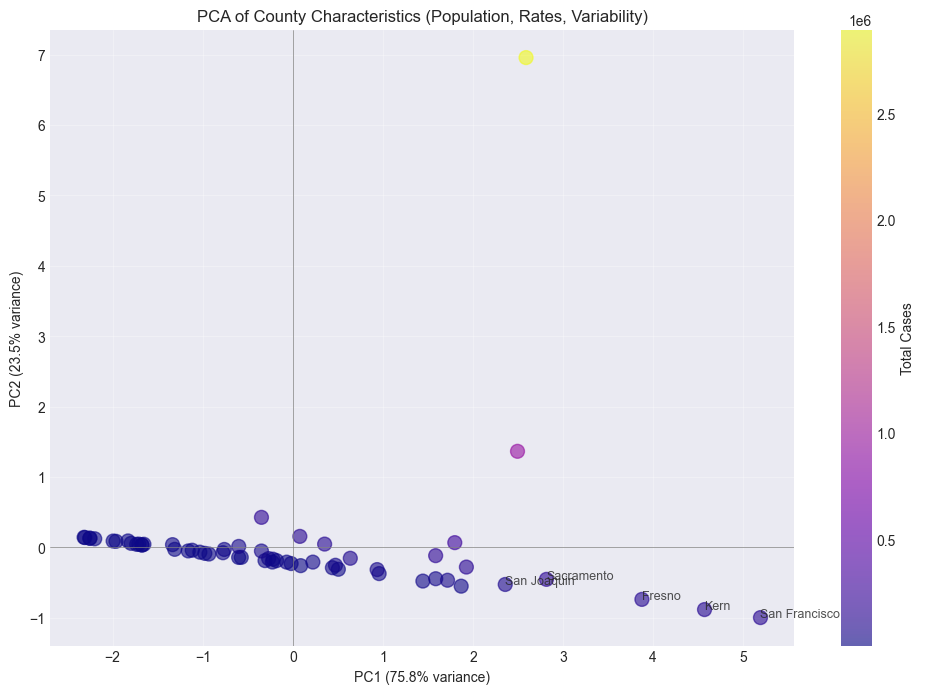

PCA Explained Variance Ratio: [0.75843391 0.23487187]
Total Variance Explained: 99.3%


In [8]:
# 6. DIMENSIONALITY REDUCTION (PCA)
print("\n6. DIMENSIONALITY REDUCTION ANALYSIS")
print("="*30)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
pca_data = county_summary[['Avg_Population', 'Avg_Rate', 'Rate_Std', 'Cases_per_100K']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create PCA dataframe
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2'],
                      index=pca_data.index)

# Plot PCA results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, 
                     c=county_summary.loc[pca_data.index, 'Total_Cases'], 
                     cmap='plasma', s=100)
plt.colorbar(scatter, label='Total Cases')

# Annotate some points
for county in county_summary_sorted.head(5).index:
    if county in pca_df.index:
        plt.annotate(county, (pca_df.loc[county, 'PC1'], pca_df.loc[county, 'PC2']),
                    fontsize=9, alpha=0.8)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('PCA of County Characteristics (Population, Rates, Variability)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)

plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_)*100:.1f}%")



7. CLUSTERING ANALYSIS


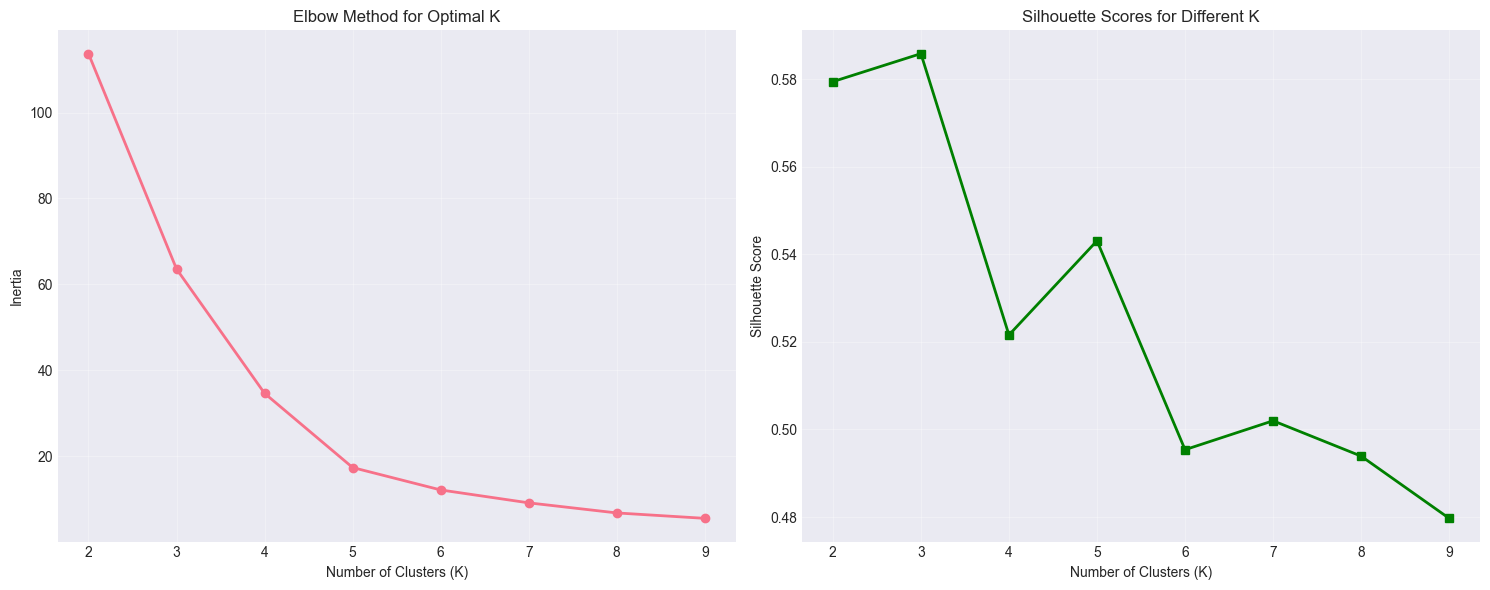

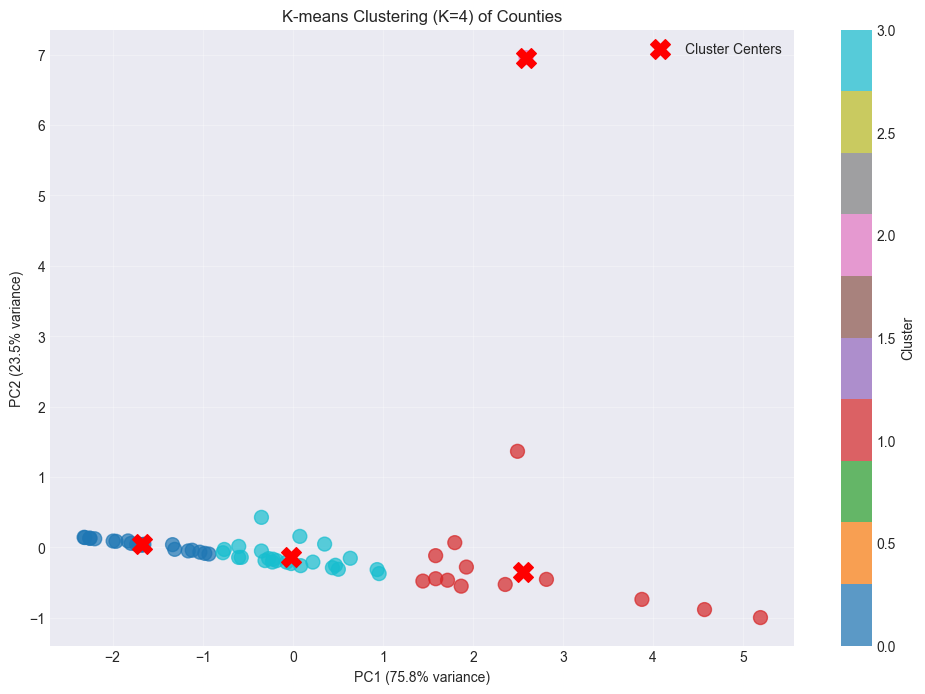

KeyError: "Column(s) ['County'] do not exist"

In [9]:
# 7. CLUSTERING ANALYSIS
print("\n7. CLUSTERING ANALYSIS")
print("="*30)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using elbow method
inertia = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot elbow method and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow plot
ax1 = axes[0]
ax1.plot(K_range, inertia, marker='o', linewidth=2)
ax1.set_title('Elbow Method for Optimal K')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2 = axes[1]
ax2.plot(K_range, silhouette_scores, marker='s', color='green', linewidth=2)
ax2.set_title('Silhouette Scores for Different K')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('clustering_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Apply K-means with optimal K (based on silhouette)
optimal_k = 4  # Based on the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add clusters to PCA plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, 
                     cmap='tab10', s=100, alpha=0.7)
plt.colorbar(scatter, label='Cluster')

# Plot cluster centers in PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
           marker='X', s=200, c='red', label='Cluster Centers')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title(f'K-means Clustering (K={optimal_k}) of Counties')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('kmeans_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze clusters
county_summary['Cluster'] = cluster_labels
cluster_analysis = county_summary.groupby('Cluster').agg({
    'Avg_Population': ['mean', 'std'],
    'Avg_Rate': ['mean', 'std'],
    'Total_Cases': ['sum', 'mean'],
    'County': 'count'
}).round(2)

print("\nCluster Analysis Summary:")
print(cluster_analysis)


8. ANOMALY DETECTION
Detected 6 anomalous counties:
['California', 'Fresno', 'Kern', 'Los Angeles', 'Sacramento', 'San Francisco']


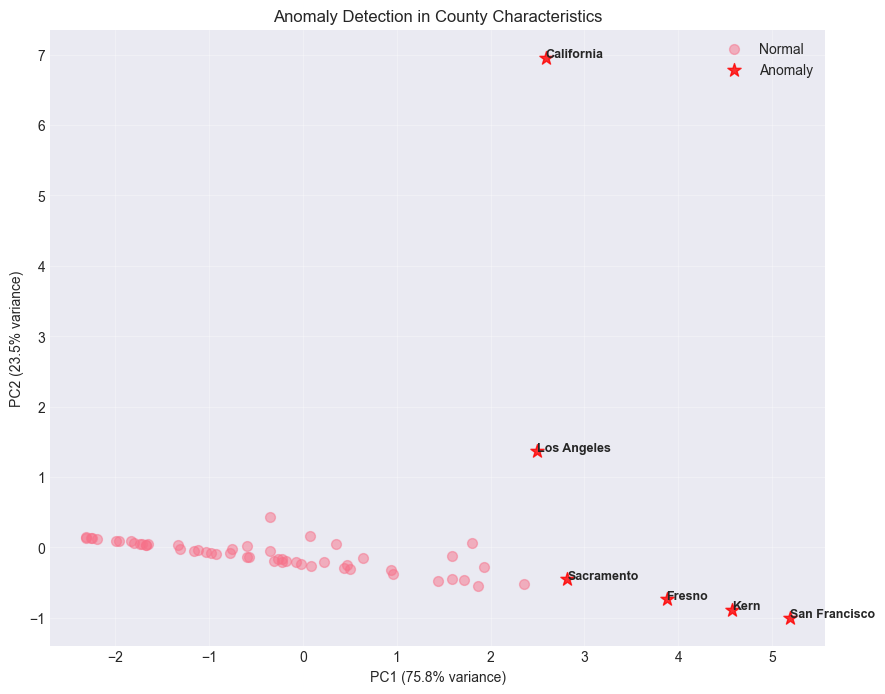

In [11]:
# 8. ANOMALY DETECTION
print("\n8. ANOMALY DETECTION")
print("="*30)

from sklearn.ensemble import IsolationForest

# Detect anomalies in county characteristics
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iso_forest.fit_predict(scaled_data)

# Identify anomalous counties
anomalous_counties = pca_data.index[anomalies == -1].tolist()
print(f"Detected {len(anomalous_counties)} anomalous counties:")
print(anomalous_counties)

# Plot anomalies
plt.figure(figsize=(10, 8))
normal_mask = anomalies == 1
anomaly_mask = anomalies == -1

plt.scatter(pca_df.loc[normal_mask, 'PC1'], pca_df.loc[normal_mask, 'PC2'], 
           alpha=0.5, label='Normal', s=50)
plt.scatter(pca_df.loc[anomaly_mask, 'PC1'], pca_df.loc[anomaly_mask, 'PC2'], 
           alpha=0.8, label='Anomaly', s=100, marker='*', c='red')

# Label anomalies
for county in anomalous_counties:
    plt.annotate(county, (pca_df.loc[county, 'PC1'], pca_df.loc[county, 'PC2']),
                fontsize=9, fontweight='bold')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Anomaly Detection in County Characteristics')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('anomaly_detection.png', dpi=300, bbox_inches='tight')
plt.show()


In [12]:
# 9. STATISTICAL TESTS
print("\n9. STATISTICAL HYPOTHESIS TESTS")
print("="*30)

# Test 1: Compare rates between different decades
temporal_data['Decade'] = (temporal_data['Year'] // 10) * 10
decade_2000 = temporal_data[temporal_data['Decade'] == 2000]['Rate']
decade_2010 = temporal_data[temporal_data['Decade'] == 2010]['Rate']

t_stat, p_value = stats.ttest_ind(decade_2000, decade_2010, equal_var=False)
print(f"T-test between 2000s and 2010s rates:")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Test 2: Correlation between population and rate
corr_coef, corr_p = stats.pearsonr(temporal_data['Population'], temporal_data['Rate'])
print(f"\nCorrelation between population and rate:")
print(f"  Correlation coefficient: {corr_coef:.3f}")
print(f"  p-value: {corr_p:.4f}")



9. STATISTICAL HYPOTHESIS TESTS
T-test between 2000s and 2010s rates:
  t-statistic: -0.899
  p-value: 0.3686
  Significant difference: No

Correlation between population and rate:
  Correlation coefficient: 0.017
  p-value: 0.0002
